# water quality analysis 
by gaurav kumar

In [1]:
#importing the libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

# Read CSV

In [2]:
#loading water dataset in python
data=pd.read_csv('C:\\Users\\Gaurav Mukherjee\\Documents\\datasets\\water_potability.csv')
                 
#check first five rows of the dataset
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [3]:
#describe of the dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
#infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# NULL Values

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#filling missing value by mode()

data['ph'].fillna(data['ph'].mean, inplace=True)


In [8]:
#filling missing value by mode()

data['Sulfate'].fillna(data['Sulfate'].mean, inplace=True)

In [9]:
#filling missing value by mode()

data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean, inplace=True)

In [10]:
#checking NULL Values

data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.corr()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
Hardness,1.000000,-0.046899,-0.030054,-0.023915,0.003610,-0.014449,-0.013837
Solids,-0.046899,1.000000,-0.070148,0.013831,0.010242,0.019546,0.033743
Chloramines,-0.030054,-0.070148,1.000000,-0.020486,-0.012653,0.002363,0.023779
Conductivity,-0.023915,0.013831,-0.020486,1.000000,0.020966,0.005798,-0.008128
Organic_carbon,0.003610,0.010242,-0.012653,0.020966,1.000000,-0.027308,-0.030001
Turbidity,-0.014449,0.019546,0.002363,0.005798,-0.027308,1.000000,0.001581
Potability,-0.013837,0.033743,0.023779,-0.008128,-0.030001,0.001581,1.000000


<AxesSubplot:>

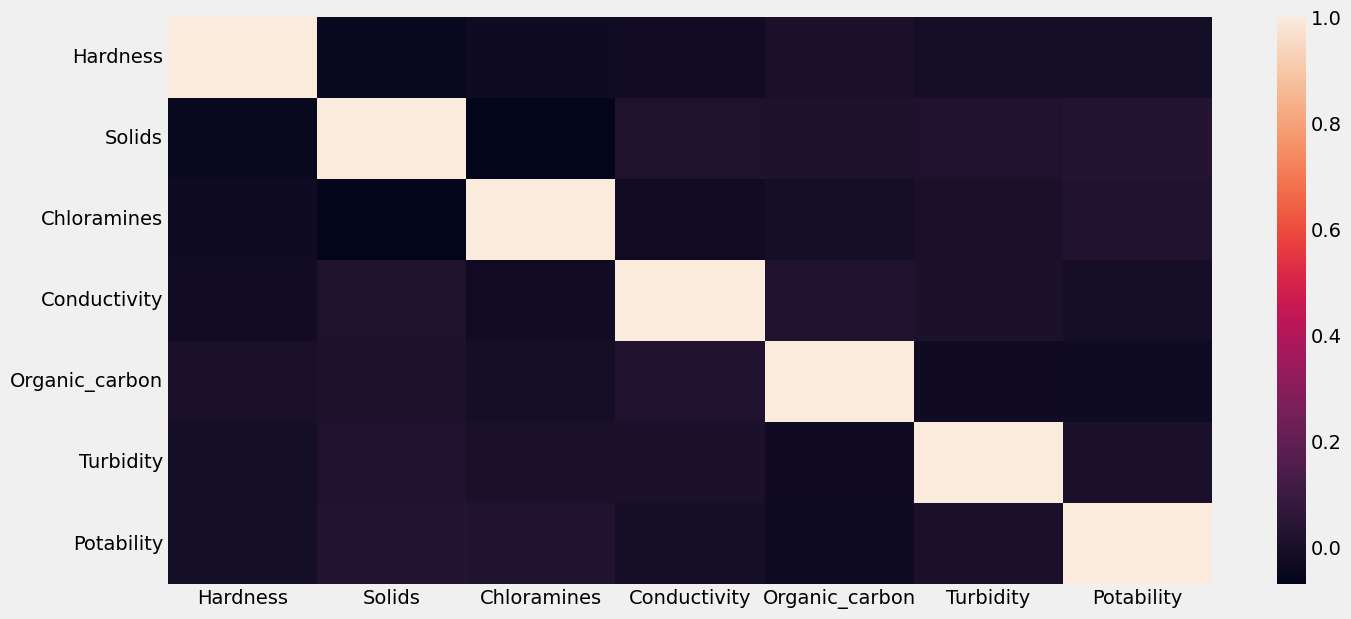

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr())

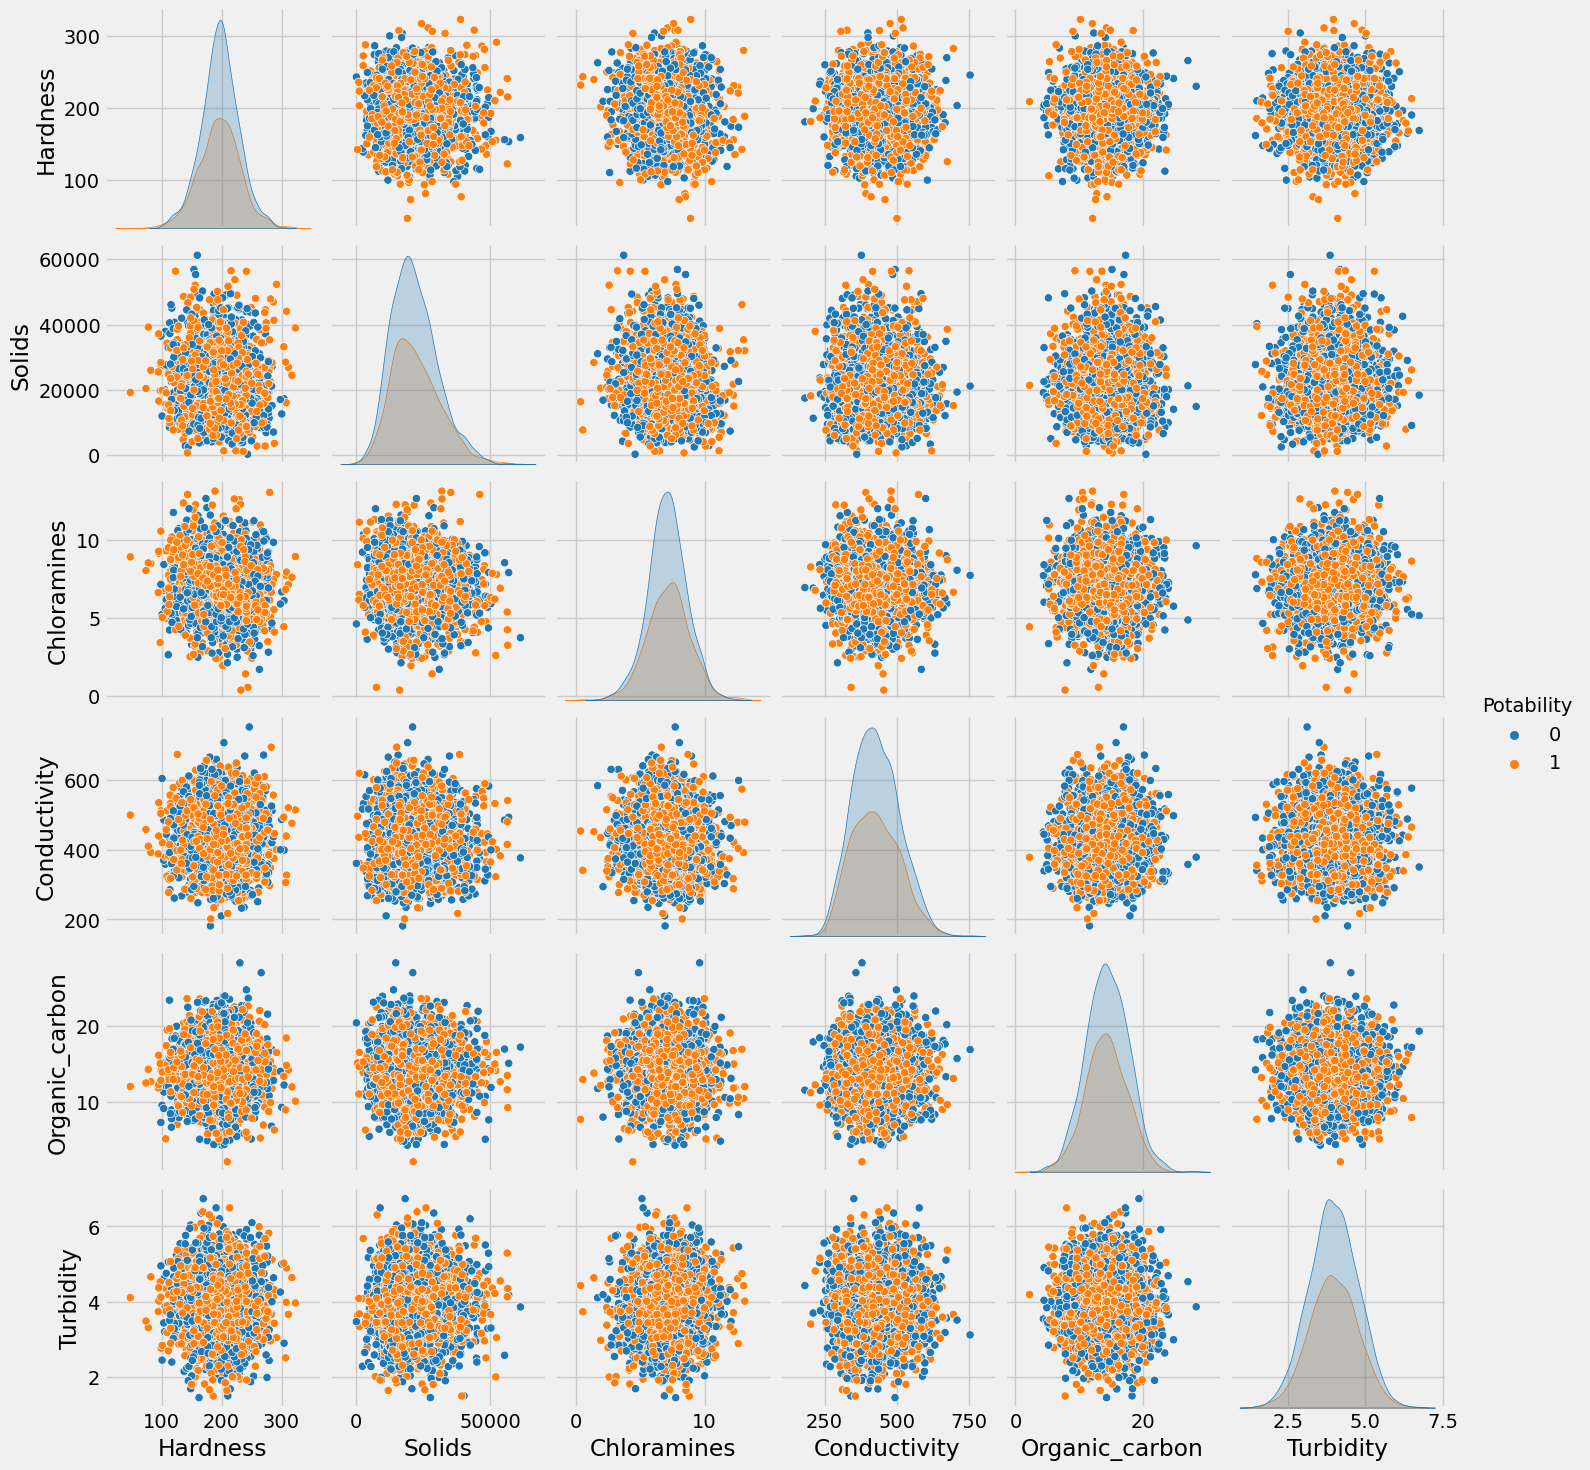

In [14]:
#plot pairplot of dataset

sns.pairplot(data, hue="Potability", palette="tab10")

# Check Potability

In [15]:
data.Potability.unique()

array([0, 1], dtype=int64)

In [16]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

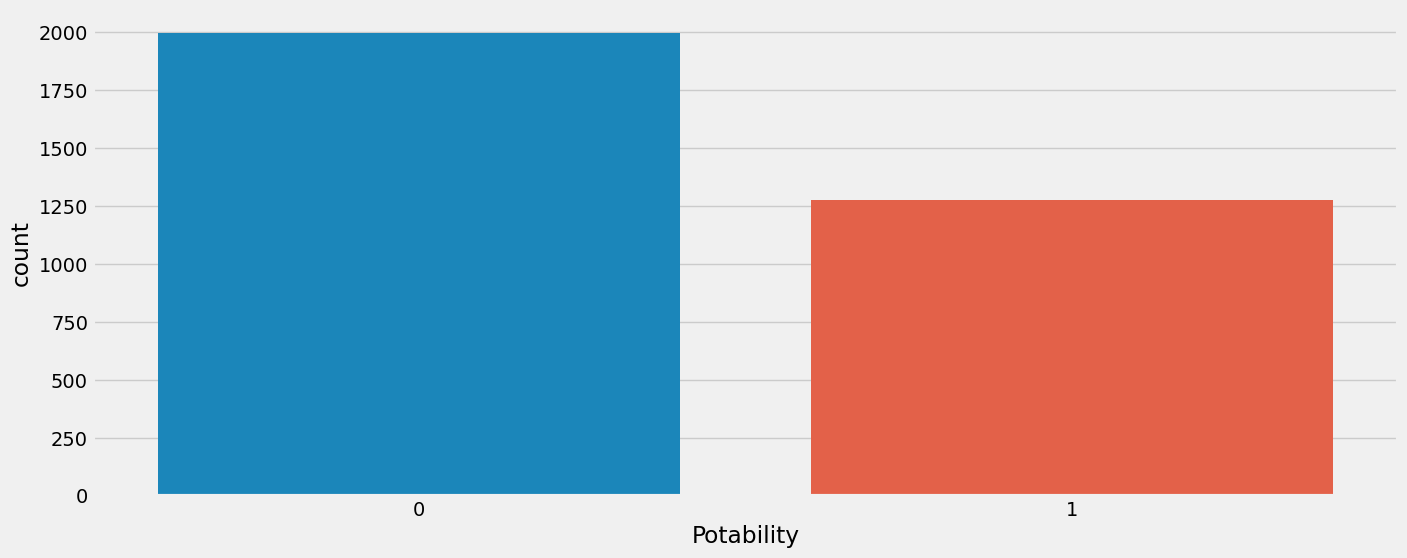

In [17]:
plt.figure(figsize=(15,6))
sns.countplot('Potability', data=data)
plt.xticks(rotation=0)
plt.show()

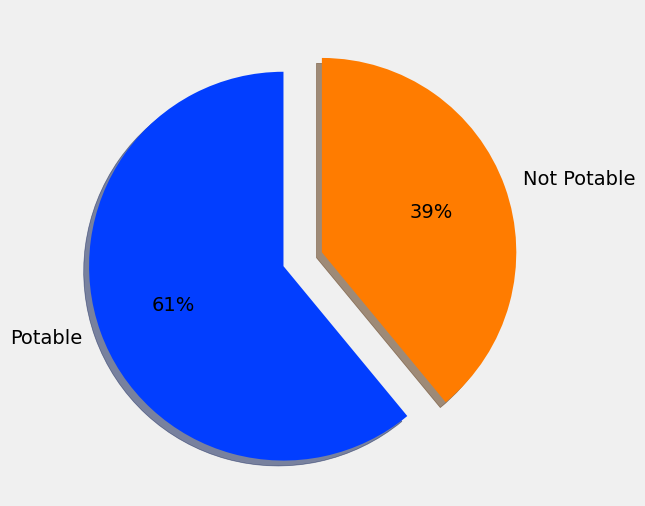

In [18]:
plt.figure(figsize=(15,6))
explode= [0.2, 0.01]
colors= sns.color_palette('bright')
plt.pie(data['Potability'].value_counts(), labels=['Potable','Not Potable'], colors=colors, autopct= '%0.0f%%',explode=explode, shadow='True', startangle=90)
plt.show()

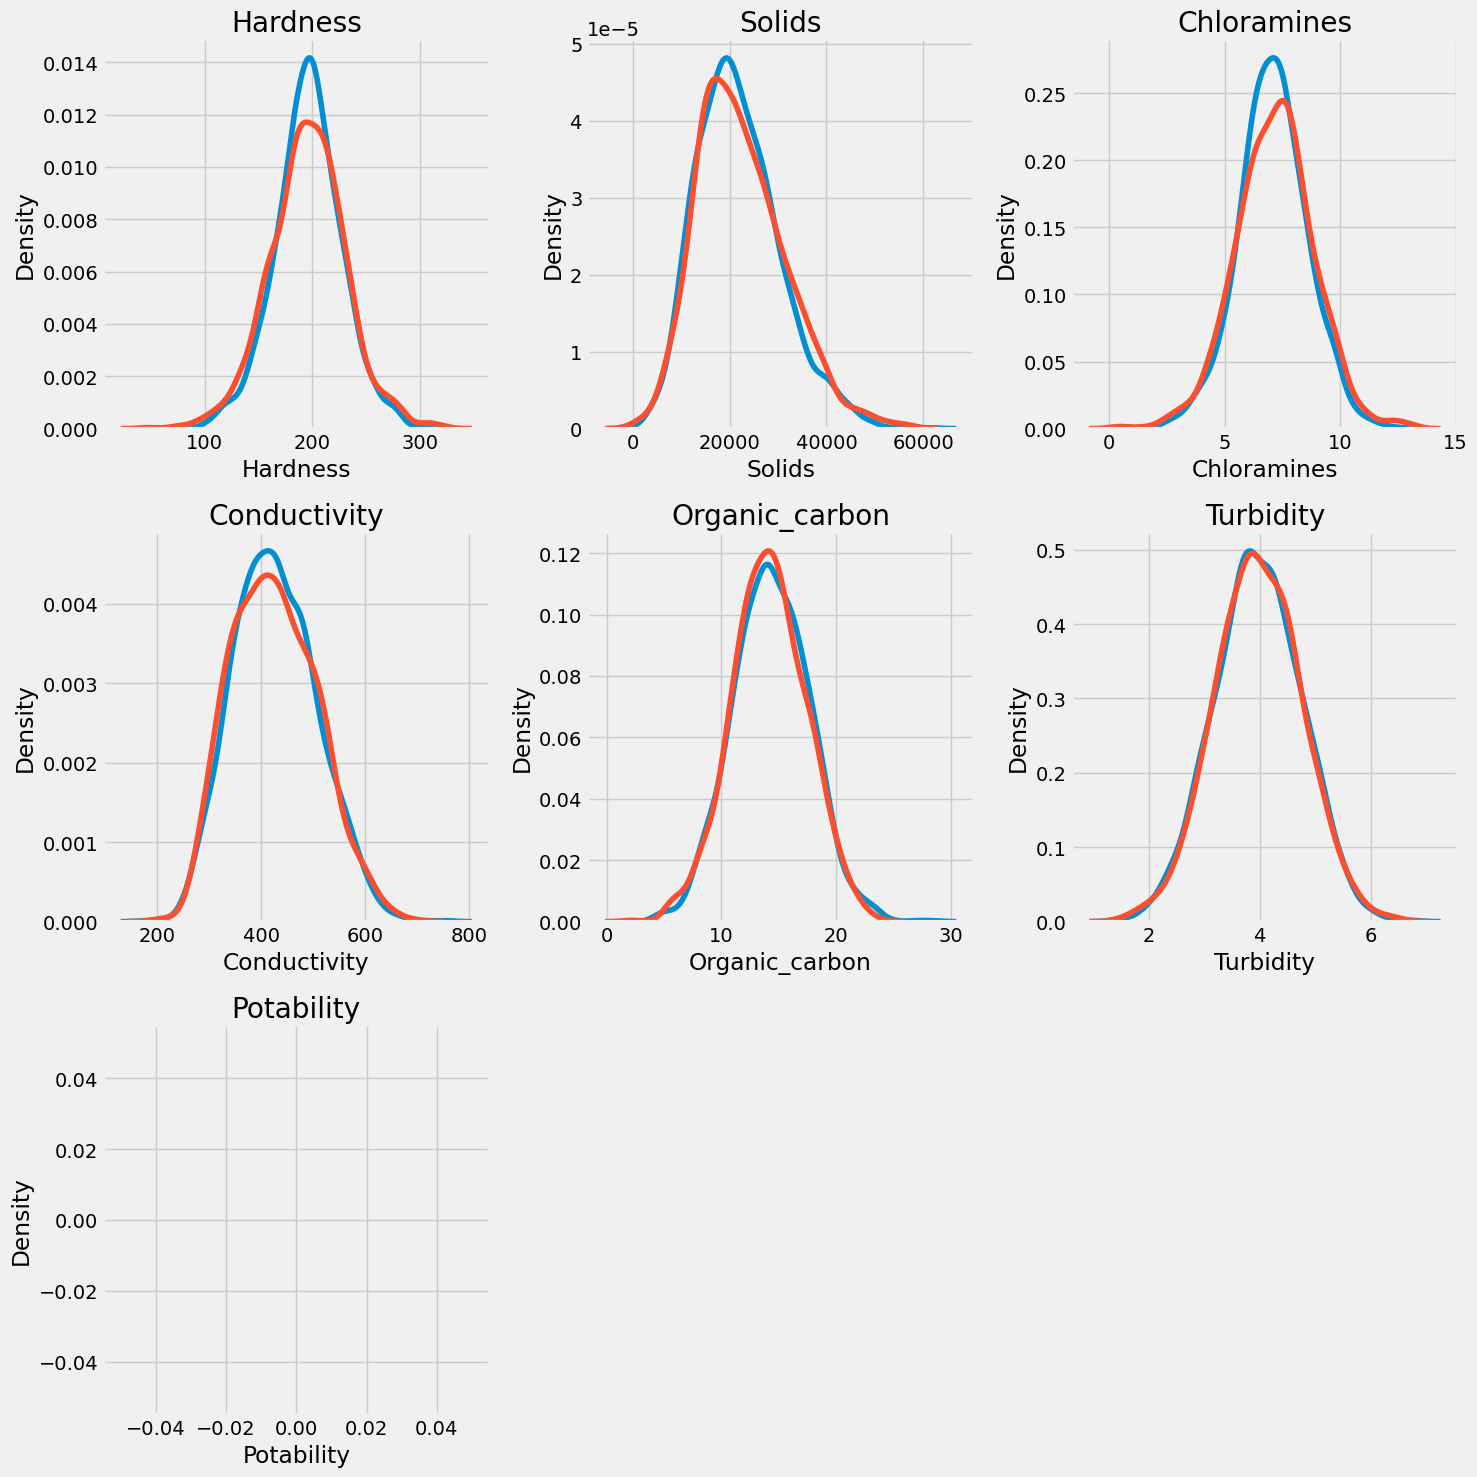

In [56]:
not_potable= data.query(" Potability == 0")
potable= data.query(" Potability == 1")
df1= data.select_dtypes([np.int, np.float])
plt.figure(figsize=(15,15))
for ax, col in enumerate(df1.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.kdeplot(x= not_potable[col], label= "Not Potable")
    sns.kdeplot(x= potable[col], label= "Potable")
    
plt.tight_layout()

In [22]:
x=df1.drop("Potability", axis=1).copy()
y=df1["Potability"].copy()

In [23]:
x.shape


(3276, 6)

In [24]:
y.shape

(3276,)

# Machine Learning 

<h4>Data Preprocessing</h4>

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# split the data to train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.20)

In [30]:
#training decision classification tree model

from sklearn import tree, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

In [31]:
tre = tree.DecisionTreeClassifier()
tre = tre.fit(x_train, y_train)
y_pred = tre.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5158336512781381


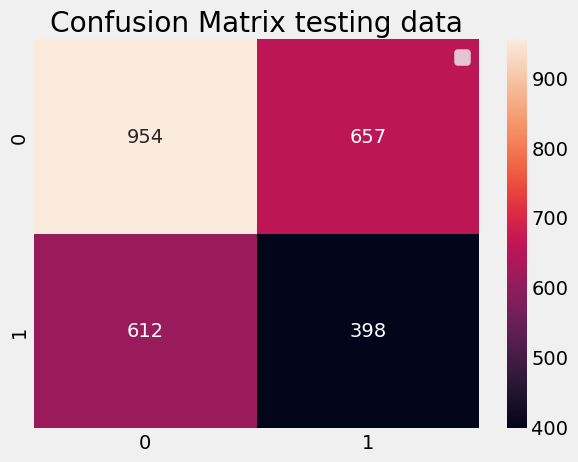

In [55]:
#confusion matrix for decision classification tree model

pred1=tre.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True, fmt='d')
plt.legend("a")
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)
from collections import Counter

<h4> Modelling and Prediction

In [37]:
model = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), svm.LinearSVC()]
trainAccuracy= list()
testAccuracy= list()
kfold= KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult= cross_val_score(mdl, x_train, y_train, scoring='accuracy')
    trainAccuracy.append(trainResult.mean())
    mdl.fit(x_train, y_train)
    y_pred= mdl.predict(x_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

In [40]:
print('The Comparision \n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy': trainAccuracy, 'Test_Accuracy': testAccuracy})
modelScore

The Comparision 



,Model,Train_Accuracy,Test_Accuracy
0,LogisticRegression(),0.574046,0.613506
1,GaussianNB(),0.564885,0.602823
2,"(DecisionTreeClassifier(max_features='auto', r...",0.532824,0.585273
3,LinearSVC(),0.444275,0.601297


              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1611
           1       0.44      0.01      0.02      1010

    accuracy                           0.61      2621
   macro avg       0.53      0.50      0.39      2621
weighted avg       0.55      0.61      0.47      2621



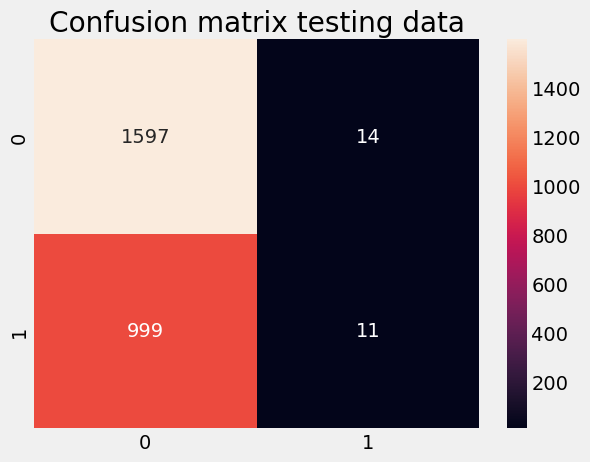

In [44]:
######## Logistic Regression ############
y_log = LogisticRegression(random_state=0)
y_log.fit(x_train, y_train)
y_log= y_log.predict(np.array(x_test))
print(metrics.classification_report(y_test, y_log))

#confusion matrix

plt.title("Confusion matrix testing data")
sns.heatmap(confusion_matrix(y_test, y_log), annot= True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1611
           1       0.46      0.17      0.25      1010

    accuracy                           0.60      2621
   macro avg       0.54      0.52      0.49      2621
weighted avg       0.56      0.60      0.55      2621



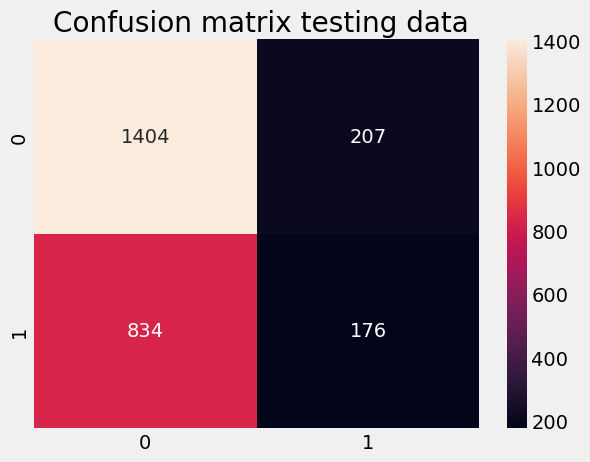

In [54]:
######### Gaussian Naive Bayes model #########

y_nb= GaussianNB()
y_nb.fit(x_train, y_train)
y_nb= y_nb.predict(np.array(x_test))
print(metrics.classification_report(y_test, y_nb))

#confusion matrix
plt.title(" Confusion matrix testing data")
sns.heatmap(confusion_matrix(y_test, y_nb), annot= True, fmt='d')
plt.show()

# Conclusion


<p> Logistic Regression and Gaussian Naive Bayes worked the best to train the model</p>
<p> Both gave us f1 score (Balanced with Precision  and recall ) as around 60% </p>